In [1]:
import os
import xarray as xr

# === Paths ===
input_folder = r"Data\raster\SILO_EA_Monthly\rainfall"  # Change for each variable
output_folder = r"Data\raster\SILO_EA_Monthly\rainfall2"  # Change for each variable
os.makedirs(output_folder, exist_ok=True)

# === List .nc files ===
nc_files = [f for f in os.listdir(input_folder) if f.endswith(".nc")]

# === Process each file ===
for nc_file in nc_files:
    nc_path = os.path.join(input_folder, nc_file)
    print(f"\n📂 Processing: {nc_file}")

    try:
        # === Load dataset ===
        ds = xr.open_dataset(nc_path)
        
        # === Keep only numeric variables ===
        numeric_vars = [
            var for var in ds.data_vars 
            if ds[var].dtype in ["float32", "float64", "int32", "int64"]
        ]

        # === Monthly sum ===
        ds_monthly = ds[numeric_vars].resample(time="MS").sum(skipna=True, min_count=1)

        # === Preserve coordinates lat and lon ===
        for coord in ["lat", "lon"]:
            if coord in ds:
                ds_monthly[coord] = ds[coord]

        # === Save file with _monthly suffix ===
        name, ext = os.path.splitext(nc_file)
        new_filename = f"{name}_monthly{ext}"
        output_path = os.path.join(output_folder, new_filename)

        ds_monthly.to_netcdf(output_path)
        print(f"✅ Saved monthly average file: {output_path}")

    except Exception as e:
        print(f"❌ Failed for {nc_file}: {e}")



📂 Processing: 1990.monthly_rain_ea.nc
✅ Saved monthly average file: Data\raster\SILO_EA_Monthly\rainfall2\1990.monthly_rain_ea_monthly.nc

📂 Processing: 1991.monthly_rain_ea.nc
✅ Saved monthly average file: Data\raster\SILO_EA_Monthly\rainfall2\1991.monthly_rain_ea_monthly.nc

📂 Processing: 1992.monthly_rain_ea.nc
✅ Saved monthly average file: Data\raster\SILO_EA_Monthly\rainfall2\1992.monthly_rain_ea_monthly.nc

📂 Processing: 1993.monthly_rain_ea.nc
✅ Saved monthly average file: Data\raster\SILO_EA_Monthly\rainfall2\1993.monthly_rain_ea_monthly.nc

📂 Processing: 1994.monthly_rain_ea.nc
✅ Saved monthly average file: Data\raster\SILO_EA_Monthly\rainfall2\1994.monthly_rain_ea_monthly.nc

📂 Processing: 1995.monthly_rain_ea.nc
✅ Saved monthly average file: Data\raster\SILO_EA_Monthly\rainfall2\1995.monthly_rain_ea_monthly.nc

📂 Processing: 1996.monthly_rain_ea.nc
✅ Saved monthly average file: Data\raster\SILO_EA_Monthly\rainfall2\1996.monthly_rain_ea_monthly.nc

📂 Processing: 1997.monthly

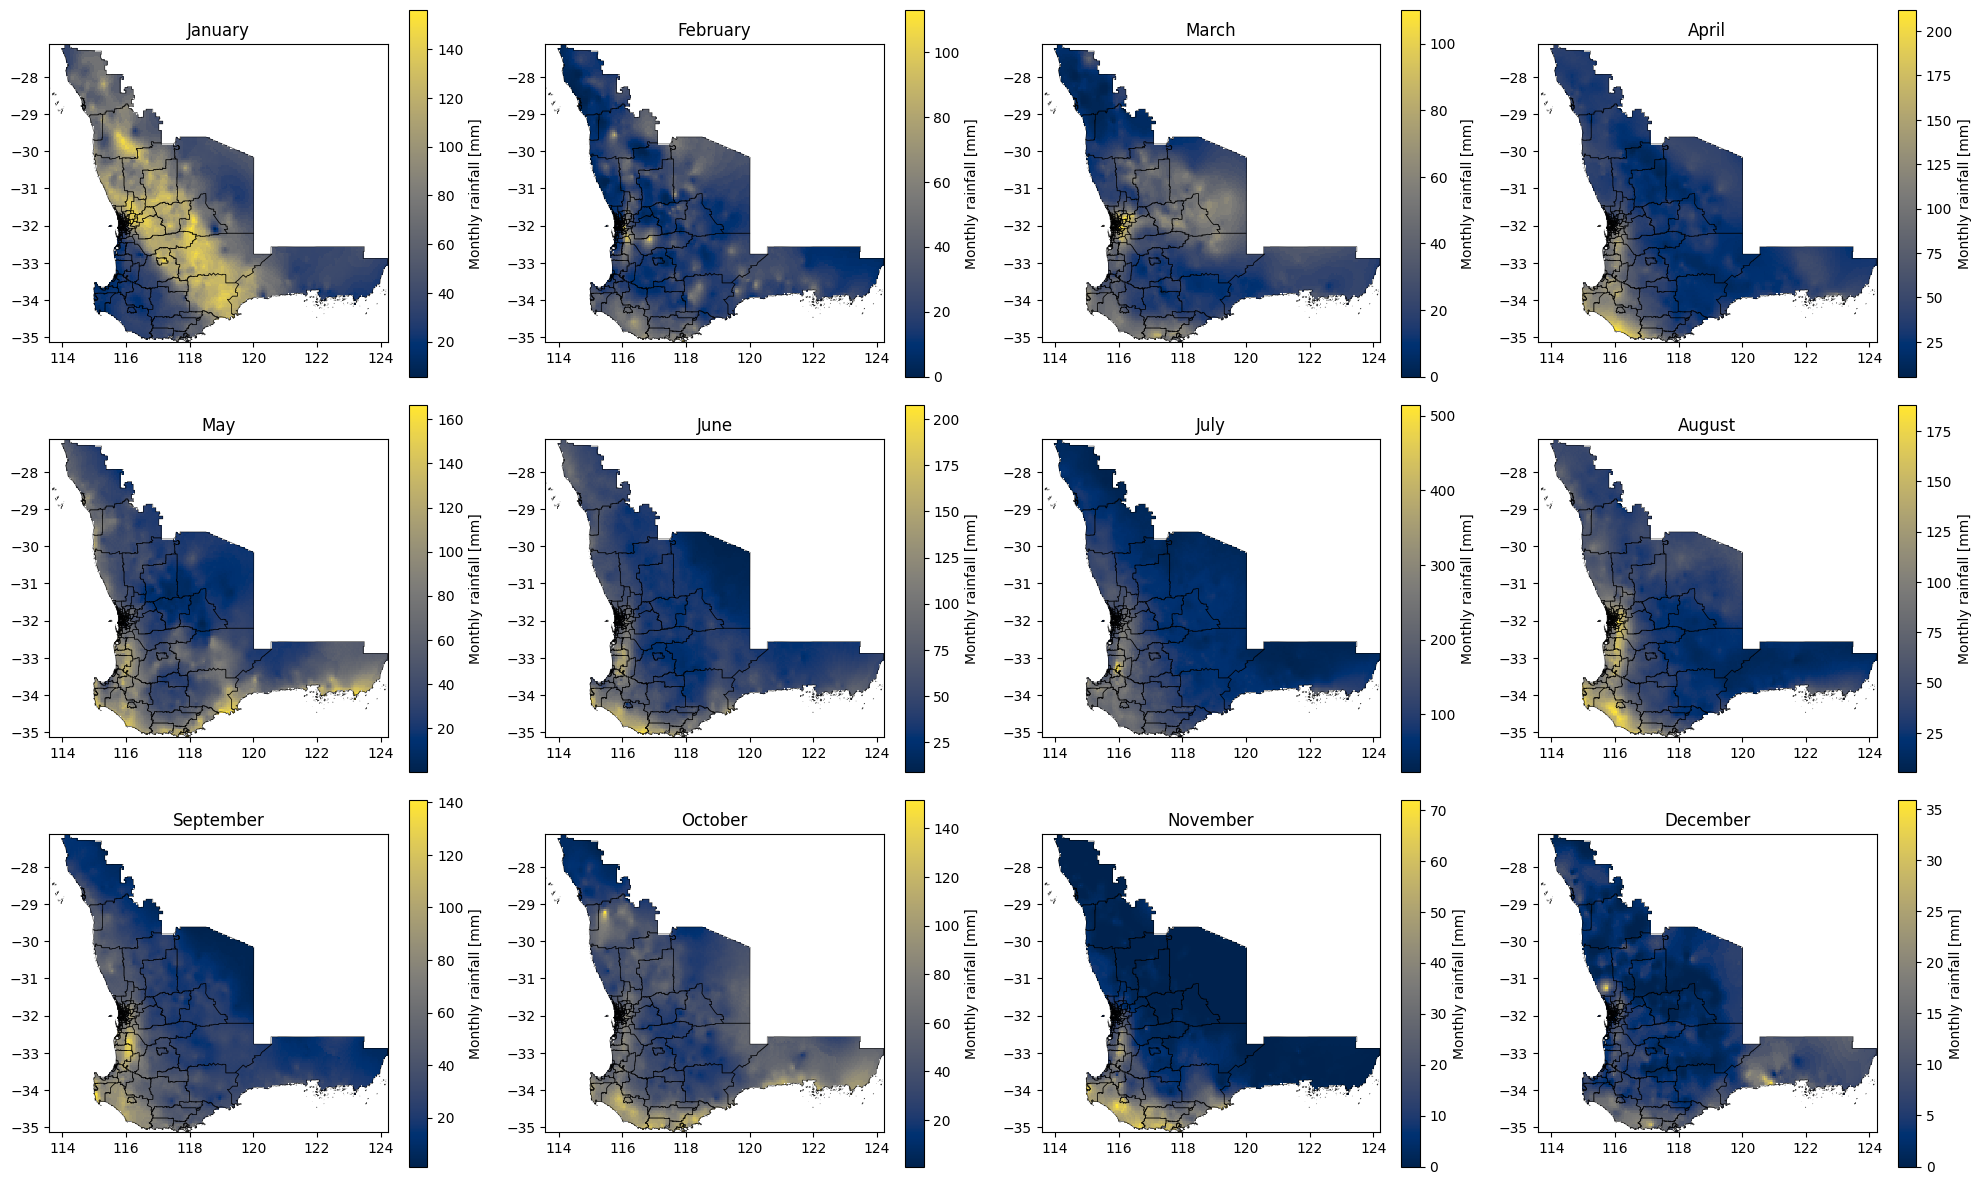

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Eastern_Aus_Bunbury\Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly max temperature data for QLD ===
ds = xr.open_dataset(r'Data\raster\SILO_EA_Monthly\rainfall\1990.monthly_rain_ea.nc')
monthly_rain = ds['monthly_rain']  # Adjust variable name as needed

# === Create figure and axes for the plot ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month with its own colorbar ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)
    
    # Plot with individual colorbar
    data.plot(ax=ax, cmap='cividis', add_colorbar=True)
    
    # Overlay region boundaries
    qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.7)
    
    # Set the title
    ax.set_title(month.dt.strftime('%B').item())
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused axes if any ===
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
plt.tight_layout()
plt.show()


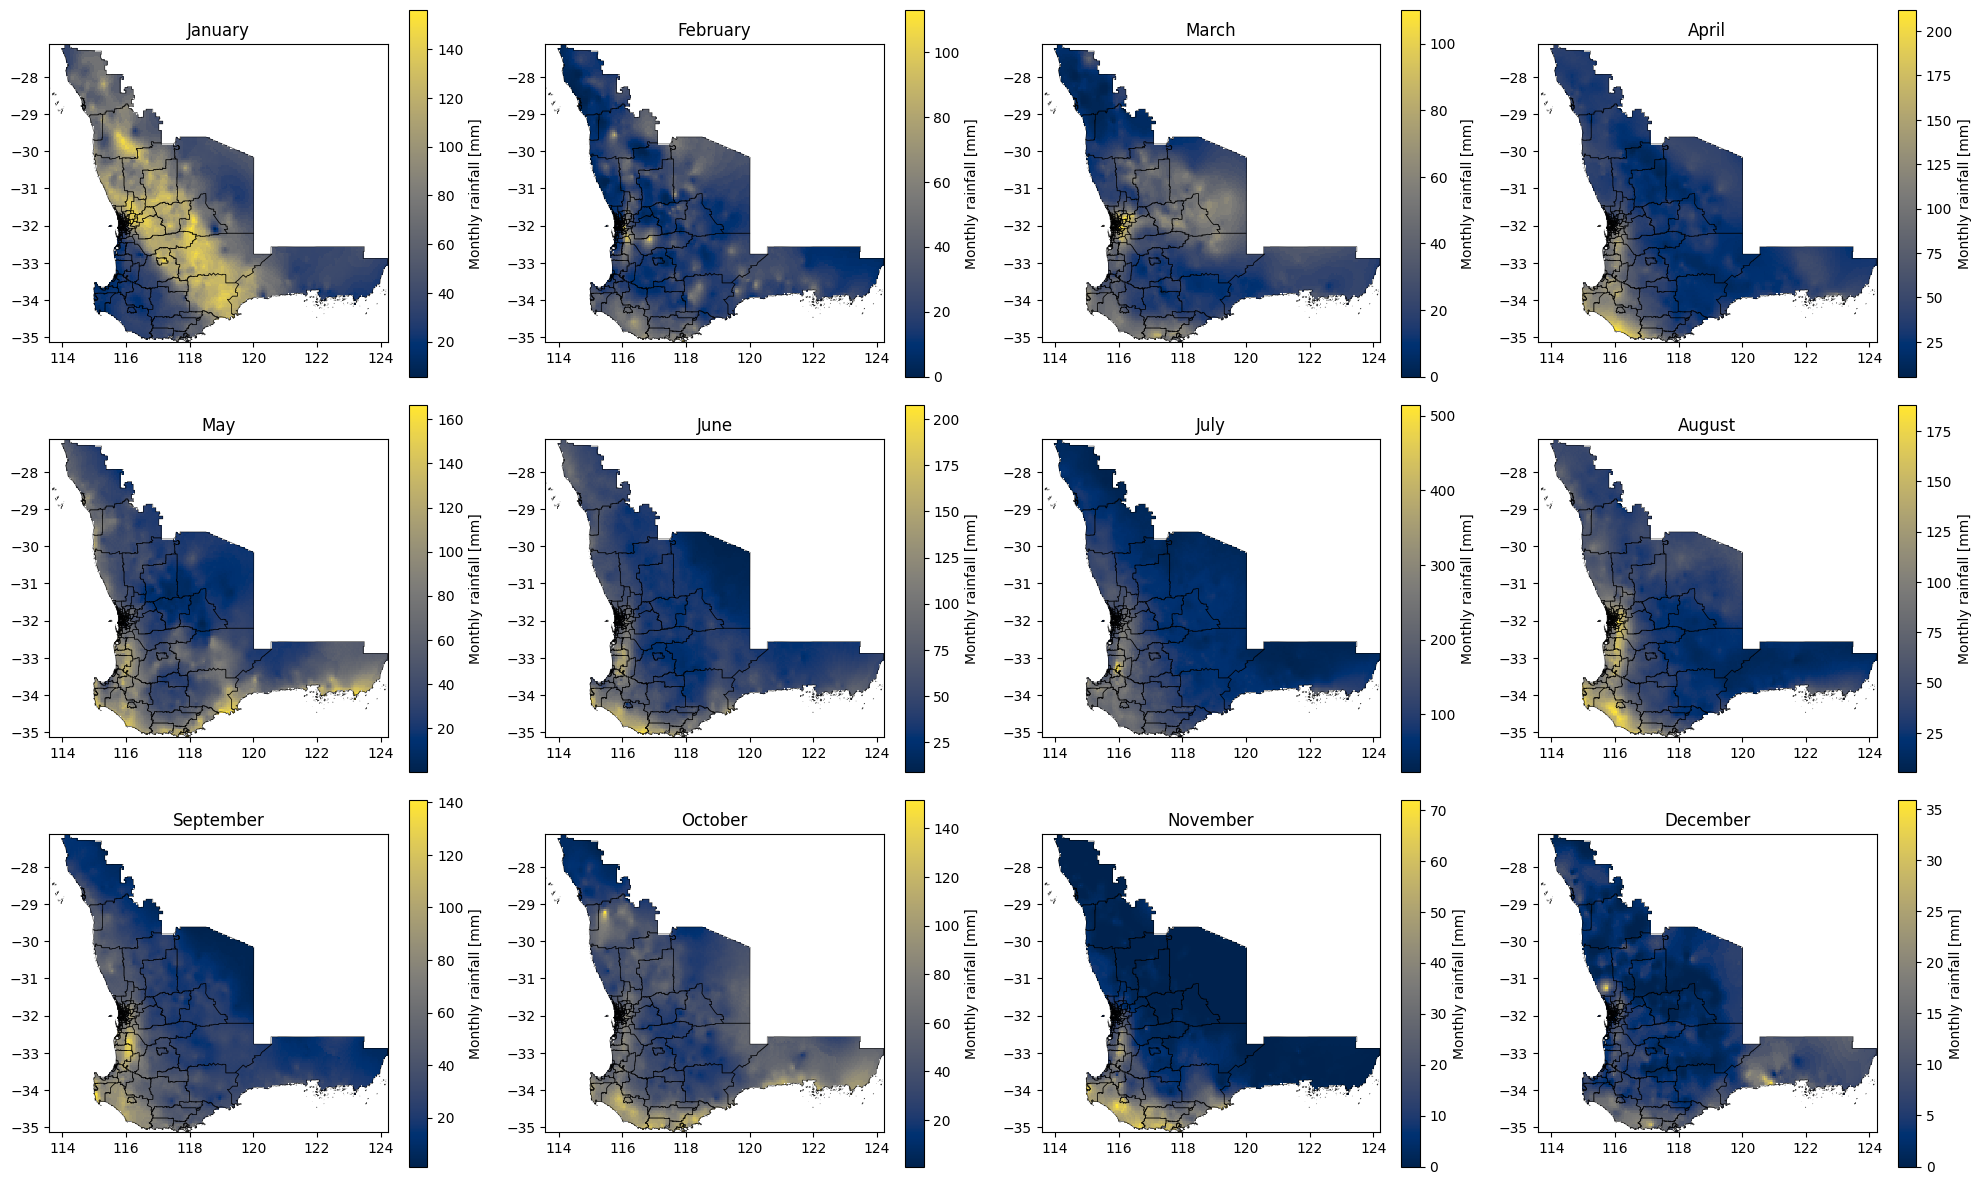

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Eastern_Aus_Bunbury\Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly max temperature data for QLD ===
ds = xr.open_dataset(r'Data\raster\SILO_EA_Monthly\rainfall2\1990.monthly_rain_ea_monthly.nc')
monthly_rain = ds['monthly_rain']  # Adjust variable name as needed

# === Create figure and axes for the plot ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month with its own colorbar ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)
    
    # Plot with individual colorbar
    data.plot(ax=ax, cmap='cividis', add_colorbar=True)
    
    # Overlay region boundaries
    qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.7)
    
    # Set the title
    ax.set_title(month.dt.strftime('%B').item())
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused axes if any ===
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
plt.tight_layout()
plt.show()
